# Examining both coefficients in region 0 for both methods

For our method, it looks like we get poles in the bottom for one coefficient and zeros for the other, and they swap.  For their method it doesn't seem to change it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact
from fiberamp.fiber.microstruct.bragg import plotlogf
from scipy.optimize import newton
plt.style.use('dark_background')
%matplotlib widget

In [21]:
A = SlabExact(scale=1e-6, Ts=[2., 2., 2.], xrefs=[300, 500, 300],
              ns=[1.44, 1, 1.44], wl=1e-6, symmetric=True)


In [22]:
def coeffs_paper(Z, sign='1', field_type='TE', entry=0):
    M = A.transmission_matrix_Z(Z)
    detM = A.transmission_determinant_Z(Z, field_type=field_type)
    frac = (-M[..., 1, 0] * detM) / M[..., 0, 1]
    b = int(sign) * np.sqrt(frac, dtype=complex)
    r1 = -M[..., 1, 0] / M[..., 1, 1]
    t2 = 1 / M[..., 1, 1]
    C = 1 / np.sqrt(r1 + b * t2, dtype=complex)
    if entry ==0:
        return C
    elif entry == 1:
        return C.conjugate()
    else:
        raise TypeError('Entry must be 0 or 1')

def coeffs_ours(Z, sign='1', field_type='TE', entry=0):
    M = A.transmission_matrix_Z(Z)
    detM = A.transmission_determinant_Z(Z, field_type=field_type)
    frac = (-M[..., 1, 0] * detM) / M[..., 0, 1]
    b = int(sign) * np.sqrt(frac, dtype=complex)
    
    factor = M[..., 0, 0].conj() + b - M[..., 0, 1].conj()
    C0 = (b.conj() - M[..., 0, 1]) * factor
    C1 = M[..., 0, 0] * factor
    # factor2 = np.sqrt(4 *C0 * C1,
    #                   dtype=complex)
    
    factor2 = np.sqrt((1 + np.abs(b)**2) *
                      (np.abs(C0)**2 +
                       np.abs(C1)**2),
                      dtype=complex)

    if entry ==0:
        return C0 * np.sqrt(2/np.pi) * 1 / factor2
    elif entry == 1:
        return C1 * np.sqrt(2/np.pi) * 1 / factor2
    else:
        raise TypeError('Entry must be 0 or 1')


In [23]:
args0 = ('1', 'TE', 0)
args1 = ('1', 'TE', 1)

## Our method

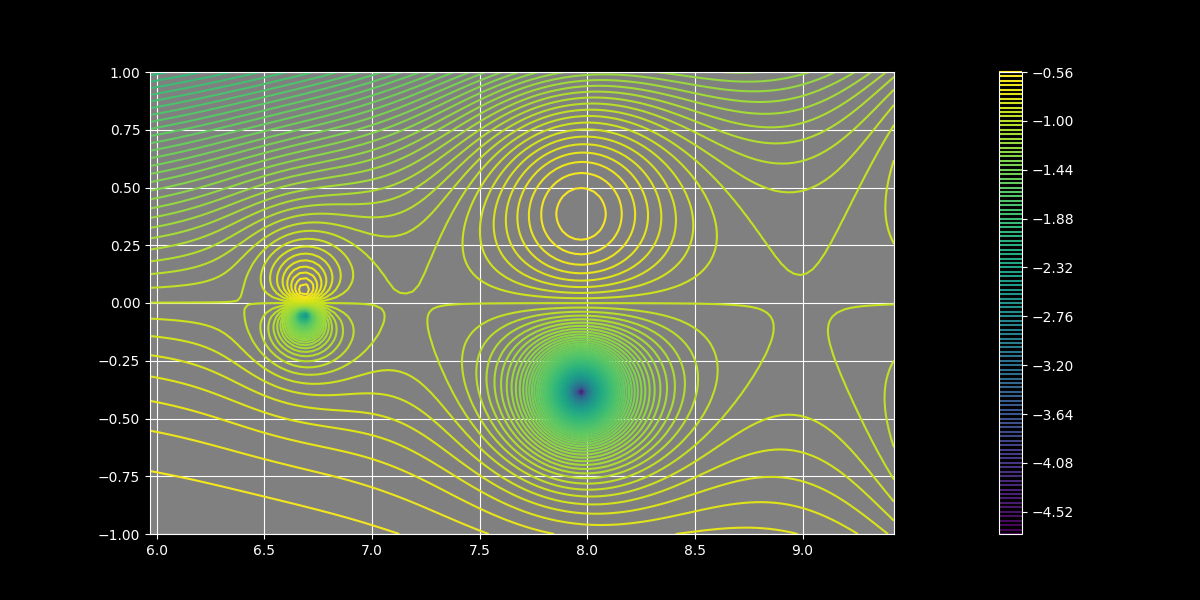

In [36]:
plotlogf(coeffs_ours, .95*A.K_low, 1.5*A.K_low, -1, 1, *args0, iref=120, rref=120, levels=120);

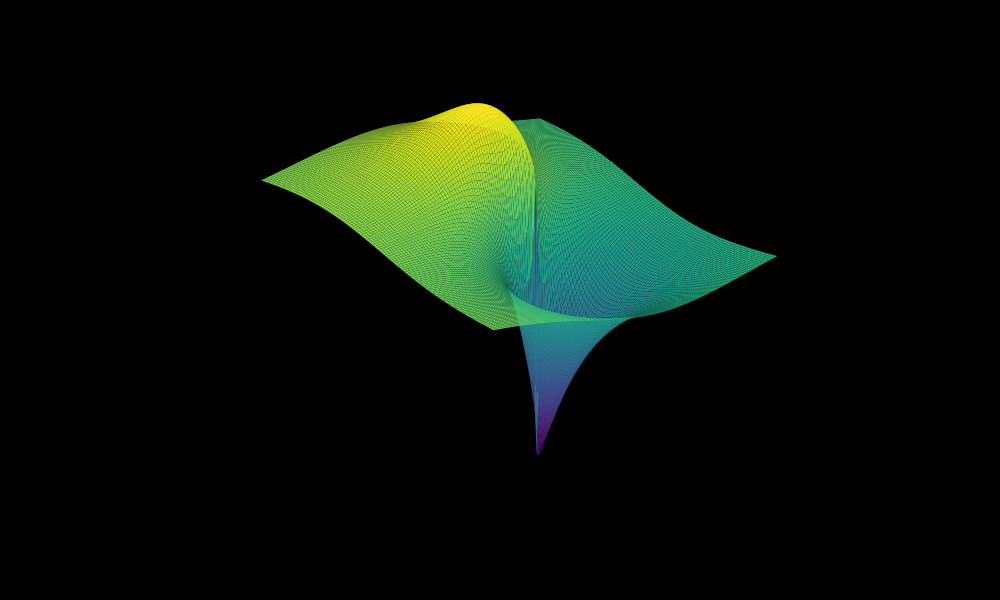

In [34]:
plotlogf(coeffs_ours, 6.5, 6.9, -.2, .2, *args0, iref=120, rref=120,  part='real', abs_off=True,
        three_D=True, rstride=1, cstride=1, figsize=(10,6), elev=30, azim=-130, roll=0, colorbar=False)

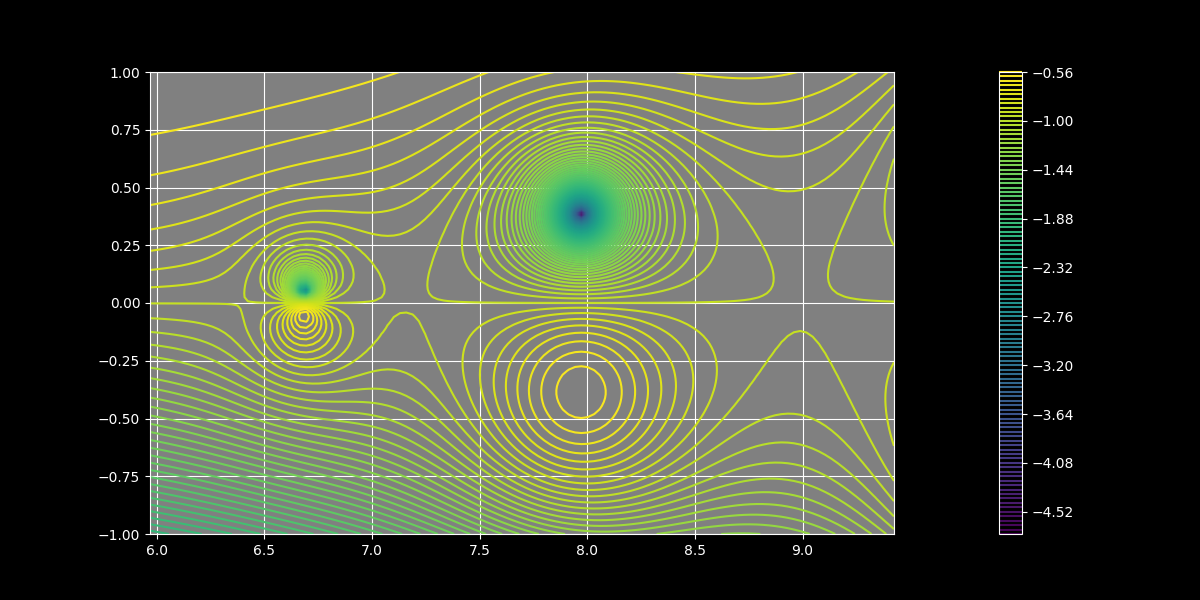

In [32]:
plotlogf(coeffs_ours, .95*A.K_low, 1.5*A.K_low, -1, 1, *args1, iref=120, rref=120, levels=120);

## Their method

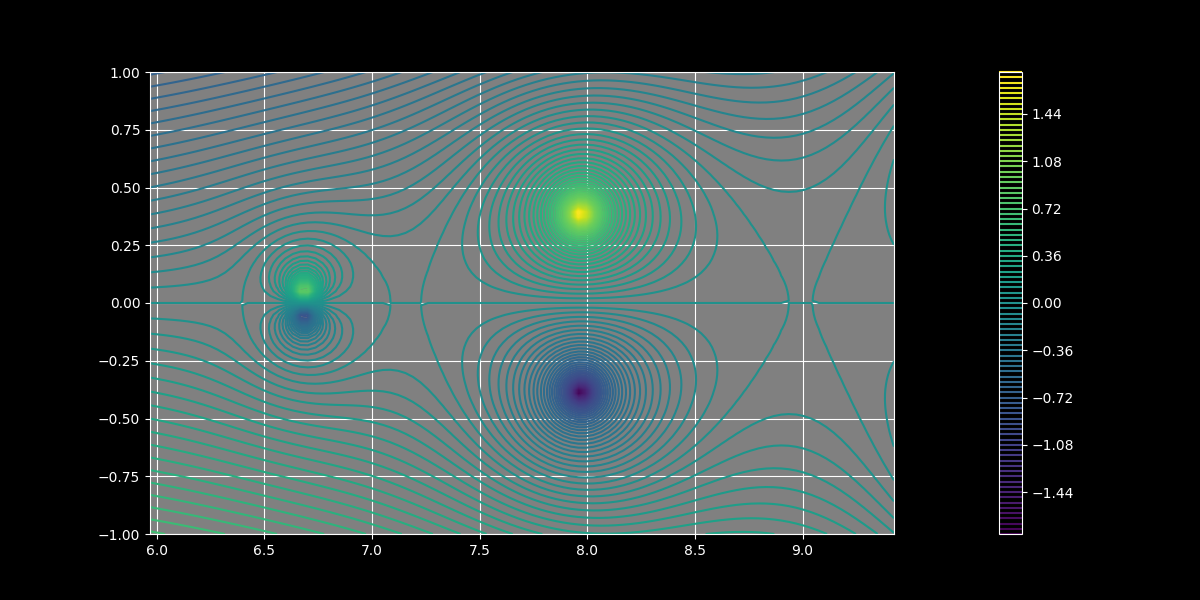

In [39]:
plotlogf(coeffs_paper, .95*A.K_low, 1.5*A.K_low, -1, 1, *args0, iref=100, rref=100, levels=100)


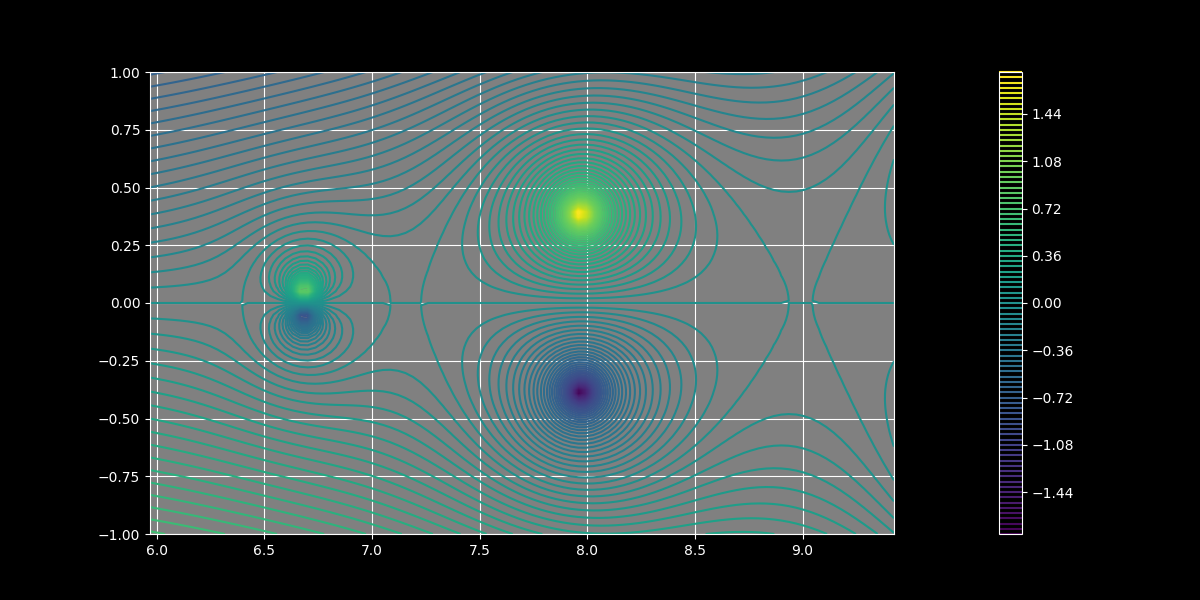

In [40]:
plotlogf(coeffs_paper, .95*A.K_low, 1.5*A.K_low, -1, 1, *args1, iref=100, rref=100, levels=100)


# Got something:

If we look at our method, and we return the first of the two coefficients (in region zero), we get zeros in bottom part of plane, but if we return second coefficient, we get poles.  So there are poles in both zones (possibly) in the integrand).

We would need to examine the integrand very thoroughly to see if poles or zeros appear, and it would possibly be region dependent.